## Hello World of DL - To classify MNIST hand written digits
* To classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).
* A set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s.

### How to input image dataset to a network? - Concept

In [3]:
import numpy as np
# Suppose dataset ds has 4 samples of 3x2 (HeightxWidth), gray-like images
ds = np.array([ [[0,0],[0,0],[0,0]], # sample 0
                [[0,9],[8,4],[7,6]], # sample 1
                [[7,7],[8,8],[9,9]], # sample 2
                [[0,0],[0,1],[0,0]], # sample 3
             ])
print(ds.shape)

(4, 3, 2)


In [4]:
ds1 = ds.reshape(4, 3*2) # to flatten for DNN
print(ds1)
print(ds1.shape)
print(ds1[0].shape)

[[0 0 0 0 0 0]
 [0 9 8 4 7 6]
 [7 7 8 8 9 9]
 [0 0 0 1 0 0]]
(4, 6)
(6,)


### This program runs without using GPU

In [5]:
import keras
from keras.datasets import mnist

# The MNIST dataset is pre-loaded in Keras, in the form of a set of four Numpy arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(train_images.shape)
print(train_images.dtype) #uint8 - unsigned int 8 bits
print(test_images.shape)

(60000, 28, 28)
uint8
(10000, 28, 28)


In [7]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

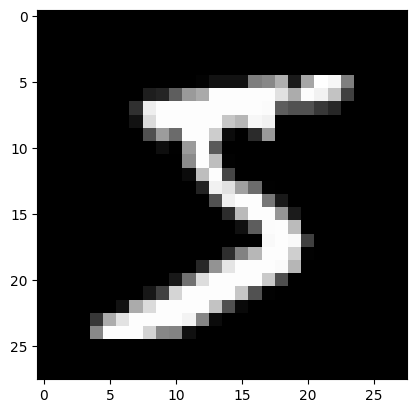

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray') # color map. Try also 'binary'
plt.show()

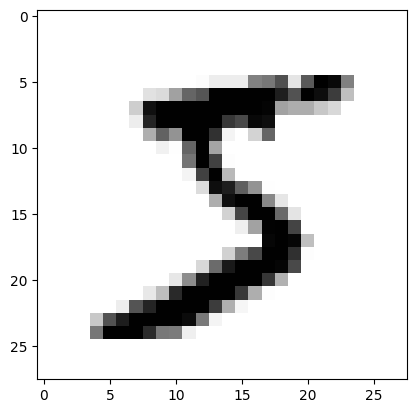

In [9]:
plt.imshow(train_images[0], cmap='binary') # color map.
plt.show()

In [10]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [11]:
train_labels_1hot = keras.utils.to_categorical(train_labels)
print(train_labels_1hot)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
print(train_labels_1hot[0])
print(train_labels_1hot[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense # Dense - fully connected neural layer.

model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)), # (n,): 1 dim. array
    # Can we use "input_dim = 28*28" instead of the input_shape ? YES
    Dense(10, activation='softmax')
    # softmax act func is recommended for the last layer muticlass classification
    # softmax layer returns an array of 10 probability scores (summing to 1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer='rmsprop',
    #loss='categorical_crossentropy', # target labels are one-hot encoded.
                             # Need to use to_categorical(). See below (*)
    loss='sparse_categorical_crossentropy', # target labels are integers
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

* Use **sparse_categorical_crossentropy** when your target labels are integers,
* use **categorical_crossentropy** when your target labels are one-hot encoded vectors. The choice depends on how the target labels are represented in your dataset.



In [15]:
# to verify # of parameters
print((28*28+1)*512+(512+1)*10)

407050


In [16]:
# need to flatten images to feed to DNN. (If CNN, do not flatten)
train_images = train_images.reshape((60000, 28 * 28)) # (60000, 28, 28) # See the input "concept" cell above.
train_images = train_images.astype('float32') / 255
      # cast to a specified type. "as" type, then convert values between 0 and 1
      # TensorFlow neurons like [0,1) values!!!!
test_images2 = test_images.reshape((10000, 28 * 28))
test_images2 = test_images2.astype('float32') / 255

In [17]:
# (*)
# The following need to be run if loss function is 'categorical_crossentropy'

# from keras.utils import to_categorical
# print(train_labels)
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
# print(train_labels[0])

In [18]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8690 - loss: 0.4493
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9652 - loss: 0.1184
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9797 - loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9851 - loss: 0.0520
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9895 - loss: 0.0372
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9922 - loss: 0.0270
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9941 - loss: 0.0209
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9956 - loss: 0.0164
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9967 - loss: 0.0128
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9979 - loss: 0.0090
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9986 - loss: 0.0064
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [20]:
acc = history.history['accuracy']
loss = history.history['loss']
loss

[0.26885494589805603,
 0.10881702601909637,
 0.0708296075463295,
 0.0509892962872982,
 0.03868304193019867,
 0.029405467212200165,
 0.022723322734236717,
 0.017157752066850662,
 0.012764353305101395,
 0.009507393464446068,
 0.006917860824614763,
 0.005296069663017988,
 0.004008481744676828,
 0.00222002062946558,
 0.0016565227415412664,
 0.001062162802554667,
 0.0008155803079716861,
 0.0005109903286211193,
 0.0004006422241218388,
 0.0003406185132917017]

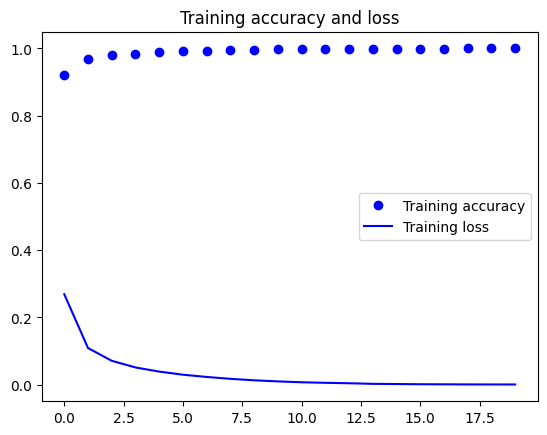

In [21]:
epoches = range(len(loss))
plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, loss, 'b', label='Training loss')
plt.title("Training accuracy and loss")
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_images2, test_labels) # unseen images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0780


In [23]:
print('test_loss:    ', test_loss)
print('test_accuracy:', test_acc)

test_loss:     0.06610522419214249
test_accuracy: 0.9837999939918518


### Display a test dight & present it to the trained network

In [24]:
print(test_images[1]) # test_images contains original, not converted images

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [25]:
print(test_images.shape)
print(test_images[1].shape)

(10000, 28, 28)
(28, 28)


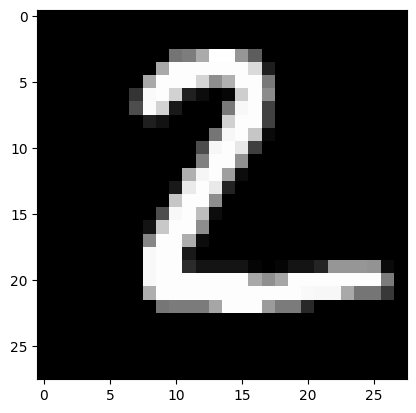

2


In [26]:
plt.imshow(np.array(test_images[1]), cmap='gray')

plt.show()
print(test_labels[1]) # converted to categorical

In [27]:
print(test_images2[1:2].shape)
print(test_images2[1].shape)
print(np.array([test_images2[1]]).shape)

(1, 784)
(784,)
(1, 784)


In [28]:
# present the image to the network
p = model.predict(test_images2[1:2], verbose=0) # test_images2 has converted images for Keras
#out = model.predict(np.array([test_images2[1]])) # or this way
print(p)

print(f"The digit is {p[0].argmax()}")

[[3.6950586e-13 4.4116000e-08 1.0000000e+00 4.8120043e-11 1.9019458e-19
  5.2519675e-13 5.0668524e-13 2.1231238e-21 8.3284449e-11 8.0892540e-18]]
The digit is 2


In [29]:
test_digits = test_images2[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([1.6119752e-12, 6.9604993e-13, 1.3793421e-09, 6.2679227e-08,
       3.1521126e-19, 8.8886336e-13, 4.4053712e-18, 9.9999982e-01,
       4.1737989e-12, 8.1696661e-10], dtype=float32)

In [30]:
predictions[0].argmax()

np.int64(7)

In [31]:
predictions[0][7]

np.float32(0.9999998)

In [32]:
test_labels[0]

np.uint8(7)

### Self-Ex: Display the 3rd test image, present it the trained NN, and check if the output is correct. (Keep the above. Add new cells below.)

Found 3 misclassified images.


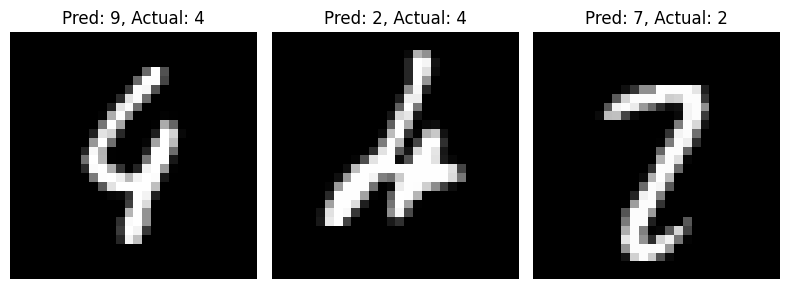

In [34]:
# Find and display first 3 misclassified images
misclassified_indices = []
for i in range(len(test_images2)):
    prediction = model.predict(test_images2[i:i+1], verbose=0)
    predicted_label = prediction[0].argmax()
    actual_label = test_labels[i]
    if predicted_label != actual_label:
        misclassified_indices.append(i)
    # Stop after finding 3 misclassified images
    if len(misclassified_indices) == 3:
        break


if misclassified_indices:
    print(f"Found {len(misclassified_indices)} misclassified images.")
    # Display the first 3 misclassified images in a row
    num_to_display = len(misclassified_indices) # Display exactly the number found (up to 3)
    plt.figure(figsize=(8, 3)) # Adjust figure size for a row of images
    for i in range(num_to_display):
        index = misclassified_indices[i]
        prediction = model.predict(test_images2[index:index+1], verbose=0)
        predicted_label = prediction[0].argmax()
        actual_label = test_labels[index]

        plt.subplot(1, num_to_display, i + 1) # Create subplots
        plt.imshow(test_images[index], cmap='gray')
        plt.title(f"Pred: {predicted_label}, Actual: {actual_label}")
        plt.axis('off') # Hide axes

    plt.tight_layout() # Adjust layout to prevent overlapping titles
    plt.show()

else:
    print("No misclassified images found in the test set.")